# Dividir el data set en conjunto de entrenamiento y de testing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("../python-ml-course-master/datasets/ads/Advertising.csv")

In [12]:
a = np.random.randn(len(data))

In [13]:
a

array([-0.51087753,  2.18047715, -0.28495348,  0.49158118,  0.10150826,
        1.36980089, -0.79433791,  0.23366386, -1.00879265,  0.47176513,
        0.7747503 , -0.04788654, -0.3853674 , -1.03852627,  1.62229165,
        1.37856261, -0.01834999,  1.833093  ,  0.57338262, -0.68248163,
       -0.13945297, -0.40596143, -0.396149  ,  0.34548354, -0.52563278,
       -1.482827  ,  0.52680925, -1.53365152, -0.74290314,  0.69050373,
        0.13128347,  0.05827315,  1.13266656, -0.22542464,  0.85855041,
       -0.3419146 ,  1.02698937, -1.65454541,  0.66856591,  1.5206774 ,
        2.23894897,  0.3475928 , -0.5884007 ,  1.05252036,  0.28735398,
       -0.16273377,  0.92928606, -0.09304359, -1.38004398,  0.27236917,
        1.06296353,  0.02321686, -1.68729004, -0.61550264, -0.7419178 ,
        2.26124611,  0.72154791,  0.63724538,  0.89896582,  1.4299617 ,
       -1.70100997,  0.63941541, -1.82722322, -0.02355202, -1.19381503,
        1.09727735, -1.20976228, -0.46825236, -0.58323383,  1.31

(array([ 3., 12., 13., 28., 30., 47., 32., 17., 15.,  3.]),
 array([-2.84382362, -2.29917318, -1.75452274, -1.2098723 , -0.66522186,
        -0.12057142,  0.42407901,  0.96872945,  1.51337989,  2.05803033,
         2.60268077]),
 <a list of 10 Patch objects>)

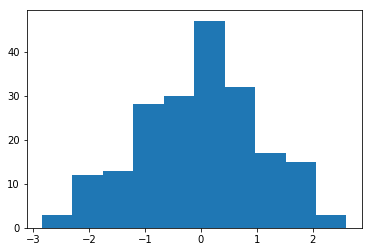

In [10]:
plt.hist(a)

In [14]:
check = (a<0.8)
training = data[check]
testing = data[~check]
check

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True, False, False,  True,  True, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [15]:
len(training), len(testing)

(158, 42)

In [17]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Sales~TV+Radio',data=training).fit()

In [18]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     672.6
Date:                Tue, 14 Aug 2018   Prob (F-statistic):           3.97e-77
Time:                        22:35:05   Log-Likelihood:                -303.57
No. Observations:                 158   AIC:                             613.1
Df Residuals:                     155   BIC:                             622.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0025      0.326      9.199      0.000       2.358       3.647
TV             0.0459      0.002     30.040      0.000       0.043       0.049
Radio          0.1816      0.009     19.750      0.000       0.163       0.200
==============================================================================
Omnibus:                       51.046   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.021
Skew:                          -1.323   Prob(JB):                     7.90e-30
Kurtosis:                       6.655   Cond. No.                         412.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 3.0025 + 0.0459 TV + 0.1816 Radio

## Validacion del modelo con el conjunto de testing

In [19]:
saled_pred = lm.predict(testing)
saled_pred

1      12.182393
5      12.283867
14     18.341347
15     20.630536
17     23.104388
32      7.733903
34      7.646928
36     23.202112
39     20.309609
40     16.342552
43     14.019583
46      8.915636
50     12.731181
55     21.099884
58     21.682111
59     18.026534
65      7.857064
69     20.921999
71     10.636921
73      9.973932
81     14.747774
82     10.144122
90     10.053401
95     16.233563
97     15.299040
98     23.975572
106     6.147407
110    14.850270
124    19.397557
131    15.694999
139    19.458624
140     9.457546
144    10.103858
148    12.065855
149     9.739411
168    17.170458
174    13.822421
176    19.883125
177    12.227030
178    16.113563
187    16.982095
197    12.811434
dtype: float64

In [21]:
SSD = sum((testing['Sales']-saled_pred)**2)
SSD

127.5909091658431

In [22]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.8087459118082774

In [23]:
sales_mean = np.mean(testing['Sales'])
error = RSE/sales_mean
error

0.11986009513402913